In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [11]:
# Load the data into a DataFrame
data = pd.read_csv("/content/marketing_data (1).csv")

# Drop unnecessary columns (e.g., CUST_ID)
data = data.drop("CUST_ID", axis=1)

# Handling missing values
data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mean(), inplace=True)
data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean(), inplace=True)

# Perform feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)


In [12]:
# Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_data, columns=["PC1", "PC2"])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

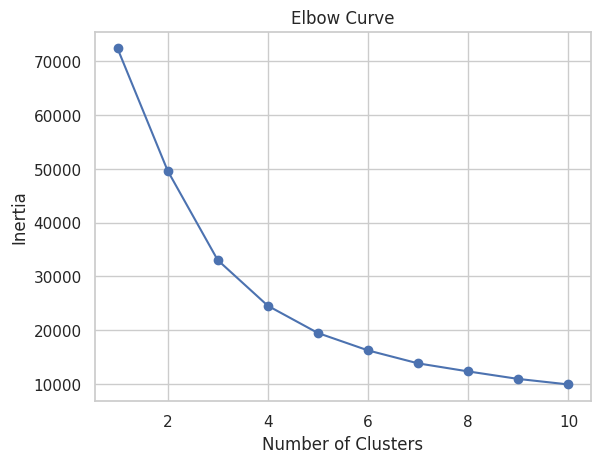

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Curve")
plt.show()

# Choose the optimal number of clusters based on the Elbow curve (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_df)

# Add the cluster labels to the PCA DataFrame
pca_df["Cluster"] = kmeans.labels_


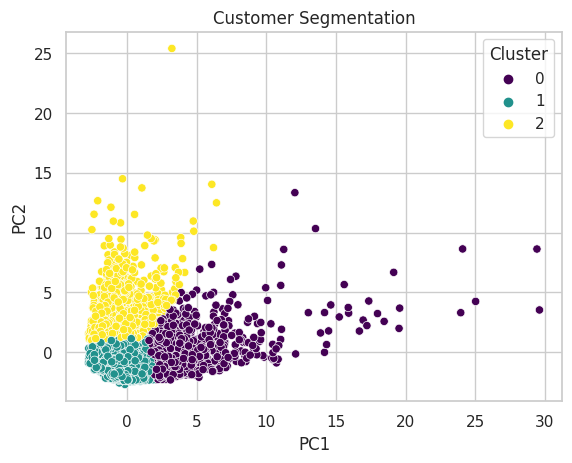

In [14]:
# Plot the clusters
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="viridis")
plt.title("Customer Segmentation")
plt.show()
